<h1><img align="right" width="350" src="img/atu-logo-full-rgb-green.jpg"> Applied Statistics - Module Tasks
</h1>
<p> 
Course: HDip in Computing in Data Analytics <br>
Module: Applied Statistics <br>
Lecturer: Ian McLoughlin <br>

Module Tasks

Student: Eilis Donohue (G00006088)

Software Used: 
 - Python v3.12 [HOLD]
 - Jupyter Notebook 6.5.2 [HOLD] 
 </p>
 
---

## Table of Contents
- [Task 1 - Lady Tasting Tea](#Task1)
- [Task 2 - numpy's Normal Distribution](#Task2)
- [Task 3 - t-test Calculation](#Task3)
- [Task 4 - ANOVA](#Task4)
- [References](#Ref)


---

In [27]:
# Import the required packages

import math
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
# Random selections
# https://docs.python.org/3/library/random.html
import random
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from scipy.special import gamma, erf      # for ease of calculting some CDFs



## Task 1 - Lady Tasting Tea <a id="Task1"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>
### Task Description








### Background 

The Lady Tasting Tea is a hypothetical randomised experiment devised by Ronald Fisher and reported in his 1935 book "The Design of Experiments" [1]. In the experiment, a lady is asked to identify from 8 cups of tea, which 4 cups have had the milk added before the tea. 

Fisher's notion of the "null hypothesis" is demonstrated in the description of the experiment. The null hypothesis is that the lady has no ability to distinguish between the cups of tea. The alternative hypothesis is that the lady can distinguish between the cups which have the milk added first and vice versa.

### Experiment / Calculation Assumptions

- The null hypothesis is assumed - that is that the lady has no special tasting powers and is choosing the cups at random. 

- The cups are indistinguishable from each other.

### Outcome
Assuming the null hypothesis (the lady is guessing and has no special tasting powers), the probability of the lady selecting the 4 cups with the milk in first is 1 in 70 which is a less than 5% probability. This is calculated using the binomial coefficient formula [2].

If the lady correctly identifies the 4 cups with the milk in first, then the null hypothesis may be rejected and the alternative hypothesis is accepted (she has a special tea tasting prowess).

Fisher has demonstrated an experiment design where the null hypothesis can be tested and either accepted or rejected based on the outcome of the experiment, given the known probability of the lady selecting the 4 cups at random.

### The Binomial Coefficient

Given the problem where there are 12 cups which 6 having the milk in first, the probability of picking the 6 cups, assuming the null hypothesis, is calculated below.

The possible number of combinations considering n number of cups with k number which have the attribute are calculated using the binomial coefficient [1]:

$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $

If there are 12 cups of tea - 6 of which have the tea added first then the problem is:

$ \binom{12}{6} = \frac{12!}{6!(12-6)!} $

This gives 924 possible permutations given a completely random outcome of 12 cups with 6 having the attribute (milk first). Therefore there is a 1 in 924 chance of identifying the 6 cups correctly.

### Derivation

The Binomial coefficient above can be derived from the fact that 12! is the number of ways 12 things can be combined randomly:

This is described by:

$ 12! = 12 \times 11 \times 10 \times 9 \times 8 \times 7 \times 6 \times 5 \times 4 \times 3 \times 2 \times 1 $

In the experiment, only 6 things are being chosen from 12: 

This can be written as follows, where the 6! below the line cancels the last 6 terms of the 12! above the line:

$ 12 \times 11 \times 10 \times 9 \times 8 \times 7 = \frac{12!}{6!} $

This is the $ \frac{n!}{(n-k)!} $ part of the Binomial equation above.

This is equal to 665280 combinations.

However, for the purpose of the experiment where 6 unorderable things are picked, the order in which they are picked does not matter. The number of ways the 6 items could be ordered is equal to:

$ 6! = 6 \times 5 \times 4 \times 3 \times 2 \times 1 $

This is equal to 720.

So, the total number of combinations must be divided by the 720 ways the chosen items could be shuffled. This is the $ \frac{1}{k!} $ part of the binomial coefficient equation above.

This reduces the number of ways the 6 items can be picked (assuming that these are not orderable), to $ \frac{665280}{720} = 924 $ 

So, if 6 things with a given attritube are to be picked, assuming that they're being chosen is entirely due to chance, the chances of the 6 things with the attribute being picked from a total of 12, is 1 in 924 or 0.11%.

In [28]:
# Python implementation of the Binomial Coefficient equation


# Function to compute the number of combinations of selection - The binomial coefficient [1]
def binomial_coef(n, k):
  combinations = math.factorial(n) / (math.factorial(k) * math.factorial (n - k))   
  return combinations

cups = 12
choose = 6

no_of_combinations = binomial_coef(cups, choose)
no_of_combinations

924.0

In [29]:
# Calculate the total number of combinations of picking 6 cups from 12 
#total_combinations = binomial_coef(cups, choose)
# Use math inbuilt .comb instead
total_combinations = math.comb(cups, choose)  # [4]
# The probability of picking all 6 with the attribute is (1 way of doing this)
Prob_all_successes = 1 / total_combinations

print(f'The total number of combination selections for {cups} cups where {choose} are chosen is {total_combinations:.0f}')
print(f'Probability of guessing {choose} cups with given attribute correctly is {Prob_all_successes:.4f} or {Prob_all_successes*100:.2f}%')

The total number of combination selections for 12 cups where 6 are chosen is 924
Probability of guessing 6 cups with given attribute correctly is 0.0011 or 0.11%


### The Hypergeometric Distribution [2]

The hypergeometric distribution describes the probability distribution for this problem as above [2]. It is a discrete probability distribution that describes the probability of k successes (random draws for which the object drawn has a specified feature) in n draws, without replacement, from a finite population of size N that contains exactly K objects with that feature, wherein each draw is either a success or a failure.

$ px(k) = Pr(X=k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}} ,$

where
N is the population size

K is the number of success states in the population

n is the number of draws

k is the number of observed successes


In [30]:
# Implementation of the hypergeometric distribution
# total number of items is N
# no of items with the attribute is K
# no of draws is n
# successes is k
#pmf =  (combinations_form(K, k) * combinations_form((N-K), (n-k)))/combinations_form(N,n)   # [2]

pmf_4_of_6 = (binomial_coef(6, 4) * binomial_coef((12-6), (6-4)))/binomial_coef(12,6)   # [1]
pmf_5_of_6 = (binomial_coef(6, 5) * binomial_coef((12-6), (6-5)))/binomial_coef(12,6)   # [1]
pmf_6_of_6 = (binomial_coef(6, 6) * binomial_coef((12-6), (6-6)))/binomial_coef(12,6)   # [1]

print(f'Probability of picking exactly 4 of 6 is {pmf_4_of_6:.4f} \n' 
      f'exactly 5 of 6 is {pmf_5_of_6:.4f} \n' 
      f'and 6 of 6 is {pmf_6_of_6:.4f}')
# Add the probability of exactly 4, 5, 6 to get the probability of at least 4
pmf_4_of_6_at_least = pmf_4_of_6 + pmf_5_of_6 + pmf_6_of_6

print(f'Probability of picking at least 4 with the attribute is {pmf_4_of_6_at_least:.4f}')


Probability of picking exactly 4 of 6 is 0.2435 
exactly 5 of 6 is 0.0390 
and 6 of 6 is 0.0011
Probability of picking at least 4 with the attribute is 0.2835


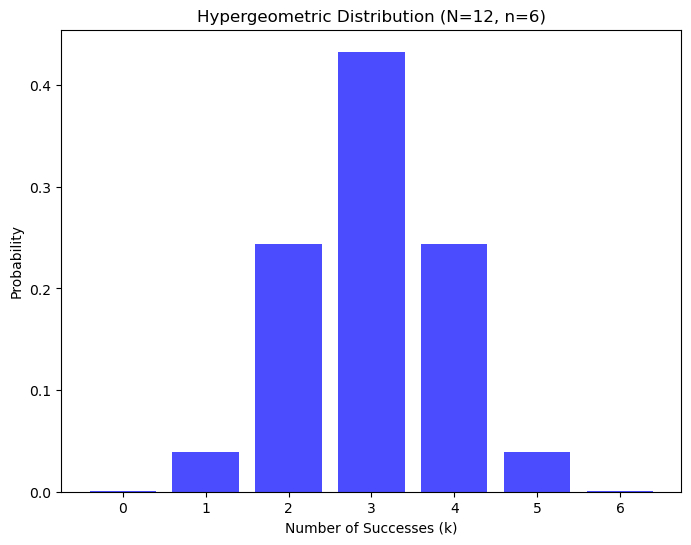

In [31]:
# Generate the hypergeometric distribution for all possible outcomes and plot
pmf = []
for i in range(choose+1):
      prob = (binomial_coef(choose, i) * binomial_coef((cups-choose), (choose-i)))/binomial_coef(cups,choose)   # [1]
      pmf.append(prob)

plt.figure(figsize=(8, 6))
plt.bar(range(6 + 1), pmf, color='blue', alpha=0.7)
plt.title('Hypergeometric Distribution (N=12, n=6)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.show()

In [32]:
# Altenative method to calculate the probability of at least 4 successes (slightly different from lecture)
# Create a list of the population
#cups = ['milk_first','milk_first', 'milk_first', 'milk_first', 'milk_first', 'milk_first', 'tea_first', 'tea_first', 'tea_first', 'tea_first', 'tea_first', 'tea_first']
cups = ['milk_first','milk_first', 'milk_first', 'milk_first', 'tea_first', 'tea_first', 'tea_first', 'tea_first']

cups_to_choose = 4

In [33]:
# The ways to choose 6 cups from 12
combs = list(itertools.combinations(cups, cups_to_choose))
print(f'The number of ways of picking 6 items from the population is {len(combs)}')

The number of ways of picking 6 items from the population is 70


In [34]:
# For each combination, count the number of 'milk_first' items
milk_first_counts = [comb.count('milk_first') for comb in combs]

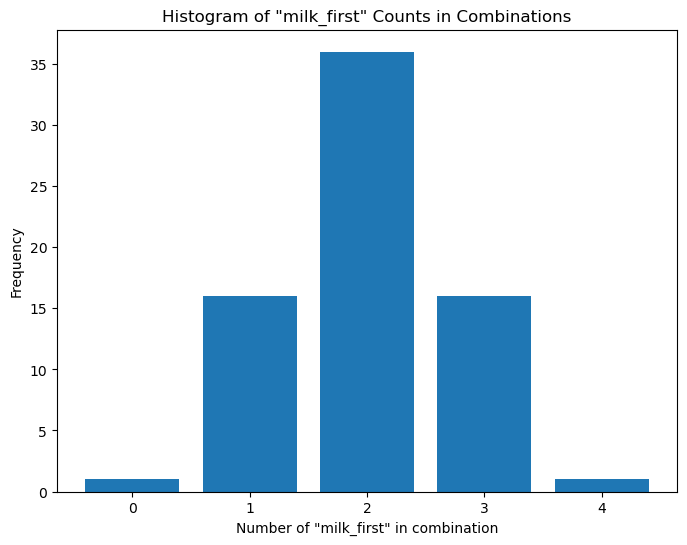

In [35]:
# Plot the histogram of the milk first cups in each combination
plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(milk_first_counts, bins=range(0, max(milk_first_counts) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of "milk_first" in combination')
plt.ylabel('Frequency')
plt.title('Histogram of "milk_first" Counts in Combinations')
plt.show()

In [36]:
# The output from the histogram
counts

array([ 1., 16., 36., 16.,  1.])

In [37]:
# Calculate the probability from the histogram data
successes_4 = sum(counts[4:])
successes_5 = sum(counts[5:])
total_combinations = sum(counts)
prob_4_or_more = successes_4 / total_combinations
prob_5_or_more = successes_5 / total_combinations

print(f'Probability of picking at least 4 with the milk first is {prob_4_or_more:.4f} or {prob_4_or_more*100:.2f}%')
print(f'Probability of picking at least 5 with the milk first is {prob_5_or_more:.4f} or {prob_5_or_more*100:.2f}%')

Probability of picking at least 4 with the milk first is 0.0143 or 1.43%
Probability of picking at least 5 with the milk first is 0.0000 or 0.00%


### Significance of allowing 2 mistakes from 6 choices [HOLD]

If the experiment is designed such that the lady or tea-taster is allowed to make 2 mistakes out of 6 choices, then there is a 28% chance that they will "pass" the test and that the null hypothesis will be rejected. Therefore there is a significant probability that the experiment will generate a false positive, i.e., the taster will choose 4 correct cups out of 6 purely by chance. By comparison, allowing only 1 mistake would mean a <5% chance of picking 5 correct cups. 

In conclusion, allowing 2 mistakes (out of 6) introduces a significant probability of the test resulting in a **false positive** (28% chance). Allowing only 1 mistake out of 6 makes for a more robust experiment in that a false positive is unlikely (<5% probability).

## Task 2 - numpy's Normal Distribution <a id="Task2"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

A random data set of 100000 numbers is generated using numpy's random.normal function [7].

In [38]:
# Define n as the number of samples, mean and standard deviation
n = 100000
mean = 10
st_dev = 3

# Generate the random normal distributed data with numpy generator [7]
np.random.seed(42)
data = np.random.normal(loc=mean, scale=st_dev, size=n)
data

array([11.49014246,  9.5852071 , 11.94306561, ..., 11.22755523,
        9.36672499, 10.36018882])

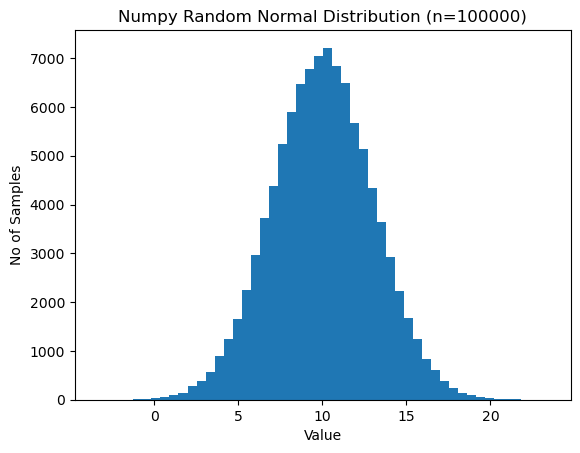

In [39]:
# Visualise the data with a histogram as data is not discrete
plt.hist(data, bins=50);
plt.title('Numpy Random Normal Distribution (n=100000)')
plt.xlabel('Value')
plt.ylabel('No of Samples')
plt.show()

#### The Shapiro-Wilk Test

The Shapiro-Wilk test is a statistical hypothesis test of normality [5]. The null hypothesis of the test is that the data is normally distributed. If the p-value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data is not normally distributed.

The p-value is the probability of observing a test statistic as extreme as the one computed, assuming that the null hypothesis is true. The p-value is used to determine the significance of the test. If the p-value is less than the significance level, the data is not normal.

In the example below, where the data has been generated using numpy's random.normal function, the Shapiro-Wilk test returns a p-value of 0.5. The p-value is compared to the alpha or significance level of 0.05 to determine if the null hypothesis can be rejected. The returned value of 0.501 indicates that strong evidence to accept the null hypothesis (i.e., that the data is normally distributed).

The statistic or W value is a measure of the strength of the relationship between the data and the normal distribution. The closer W is to 1, the more likely the data is to be normally distributed.

In [40]:
# Run the Shapiro-Wilk test as included in scipy.stats [8]
statistic, pvalue = stats.shapiro(data)
print(f'Statistic: {statistic:.6f}, p-value: {pvalue:.6f}')

Statistic: 0.999991, p-value: 0.999830


c:\Users\eilis.donohue\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


The normal distribution probability distribution function is included in scipy stats package [6]. The random generated data can be automatically scaled when it is plotted using the plt.hist function. As expected, there is close agreement between the histogram of the data and the normal distribution pdf curve.


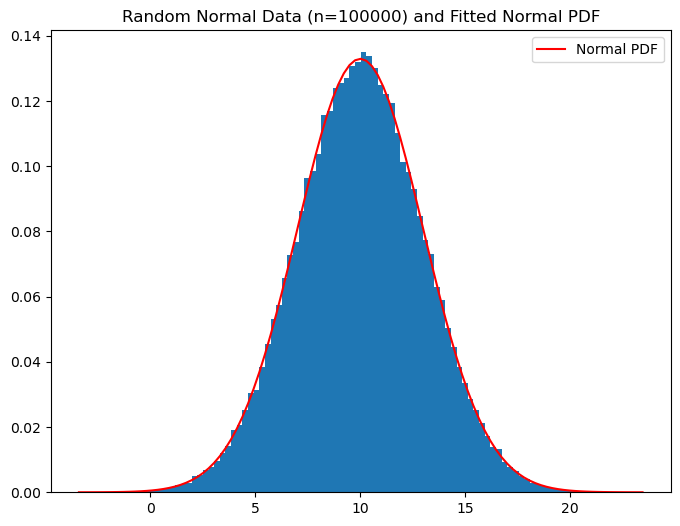

In [41]:
# Using scipy stats for normal pdf
no_of_bins = 100
plt.figure(figsize=(8, 6))

# Plot the normal random data normalised, return the bins and counts
count, bins, _ = plt.hist(data, bins=no_of_bins, density=True)  

# Use the bins returned from the histogram to plot the normal pdf
pdf_fitted_norm = stats.norm.pdf(bins, loc=mean, scale=st_dev)  
plt.plot(bins, pdf_fitted_norm, 'r', label='Normal PDF');
plt.title('Random Normal Data (n=100000) and Fitted Normal PDF')
plt.legend();

### Task 3 - t-test Calculation <a id="Task3"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

The resting heart rate data before and after a 2 week exercise program is given in the table:

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |




### Assumptions
In performing a t-test on the dataset, We wish to determine if the null hypothesis should be accepted or rejected. The null hypothesis being that the means of the two datasets are equal or there is no statistical difference between the two sets.

The assumptions for a valid dependent or paired t-test are:
-  The dependent variable is measured on a continuous scale - the before and after intervention resting heart rate here satisfies this criterion.
-  The data is listed by patient so consists of matched pairs of heart rates. Each patient's resting heart rate has been measured on two occasions. 
- 

In [42]:
# The table has been saved in /data/task3_ttest.txt.
# Read in the data and do some formatting
patient_data = pd.read_csv('data/task3_ttest.txt', delimiter='|')
patient_data


,Unnamed: 0,Patient ID,0,1,2,3,4,5,6,7,8,9,Unnamed: 12
0,NaN,Before,63,68,70,64,74,67,70,57,66,65,NaN
1,NaN,After,64,64,68,64,73,70,72,54,61,63,NaN


In [43]:
# Drop the first 2 columns and last column and transpose
patient_data = patient_data.drop(patient_data.columns[[0, 1,-1]], axis=1)
patient_data = patient_data.transpose()
patient_data 

,0,1
0,63,64
1,68,64
2,70,68
3,64,64
4,74,73
5,67,70
6,70,72
7,57,54
8,66,61
9,65,63


In [44]:
# Apply the column names and add the patient ID
patient_data.columns = ['Before', 'After']
patient_data['Patient ID'] = patient_data.index
patient_data

,Before,After,Patient ID
0,63,64,0
1,68,64,1
2,70,68,2
3,64,64,3
4,74,73,4
5,67,70,5
6,70,72,6
7,57,54,7
8,66,61,8
9,65,63,9


In [45]:
# Convert the data to numpy arrays and change to type float in preparation for statistical analysis
before = np.array(patient_data['Before']).astype(float)
after = np.array(patient_data['After']).astype(float)
before, after

(array([63., 68., 70., 64., 74., 67., 70., 57., 66., 65.]),
 array([64., 64., 68., 64., 73., 70., 72., 54., 61., 63.]))

### Basic Statistics

- The mean of the before dataset is 66.4 and the after dataset is 65.3. That is a 1.7% reduction. 
- All the statistics, apart from the max and the standard deviation have reduced in the after dataset.
- The after dataset has a larger standard deviation and there is greater difference between the mean and median values than seen in the before dataset.

In [46]:
# Display the basic statistics and variance
pd.options.display.float_format = '{:.1f}'.format
print(patient_data.describe())
print(f'variance {np.var(before):.1f}\t{np.var(after):.1f}\n')
print(f'{(np.mean(before)-np.mean(after))/np.mean(before)*100:.1f}% reduction in mean')

       Before  After
count    10.0   10.0
mean     66.4   65.3
std       4.6    5.7
min      57.0   54.0
25%      64.2   63.2
50%      66.5   64.0
75%      69.5   69.5
max      74.0   73.0
variance 19.4	29.0

1.7% reduction in mean


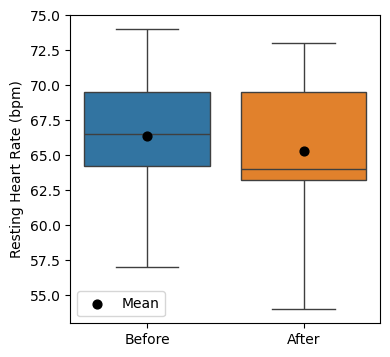

In [47]:
# Boxplot of the data in seaborn showing the means
fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(patient_data)
# Plot the means
ax.scatter(0, y=np.mean(before), color='black', s=40, marker='o', zorder=3)
ax.scatter(1, y=np.mean(after), color='black', label="Mean", s=40, marker='o', zorder=3)
ax.set(ylabel="Resting Heart Rate (bpm)")
plt.legend()
plt.show()


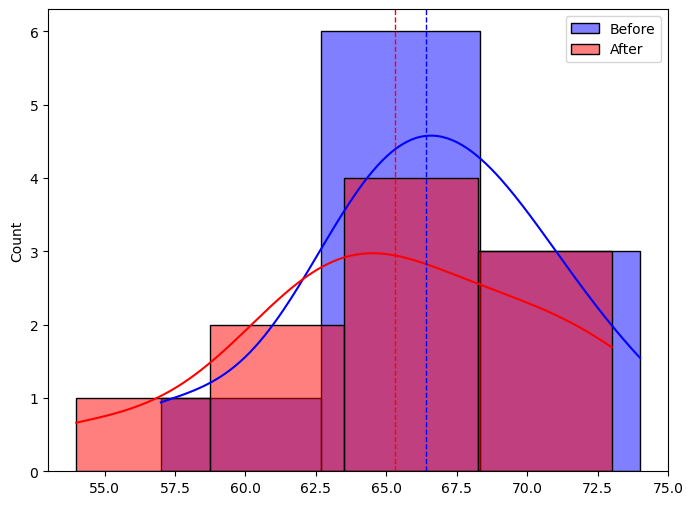

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(before, bins=3, color='blue', alpha=0.5, label='Before', kde=True);
sns.histplot(after, bins=4, color='red', alpha=0.5, label='After', kde=True);

mean_before = np.mean(before)
std_dev_before = np.std(before)

mean_after= np.mean(after)
std_dev2_after = np.std(after)

# Add in the mean lines
ax.axvline(mean_before, color='blue', linestyle='dashed', linewidth=1)
ax.axvline(mean_after, color='red', linestyle='dashed', linewidth=1)

plt.legend();


The Shapiro Wilk test (as above) is used to test the normality of the data. The high p-values for both the "Before" and "After" dataset suggest that there is no evidence to reject the null hypothesis that the data is normally distributed.

In [49]:
# Shapiro-Wilk test for normality
print(f'Before: statistic: {stats.shapiro(before)[0]:.2f}, p-value: {stats.shapiro(before)[1]:.2f}')
print(f'After: statistic: {stats.shapiro(after)[0]:.2f}, p-value: {stats.shapiro(after)[1]:.2f}')
print(f'delta: statistic: {stats.shapiro(after-before)[0]:.2f}, p-value: {stats.shapiro(after-before)[1]:.2f}')


Before: statistic: 0.97, p-value: 0.91
After: statistic: 0.94, p-value: 0.55
delta: statistic: 0.98, p-value: 0.93


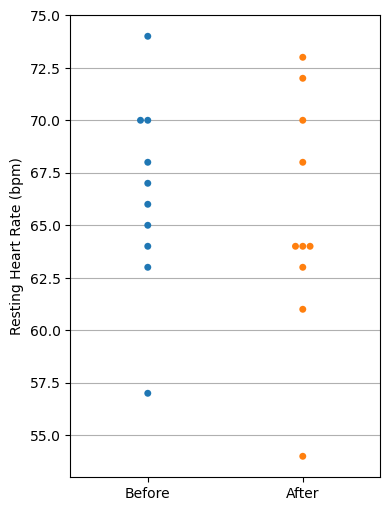

In [50]:
# Create a swarmplot [12]
plt.figure(figsize=(4, 6))
ax = sns.swarmplot(data=patient_data);
ax.set_ylabel('Resting Heart Rate (bpm)');
ax.grid(axis='y')

### Statistical t-Test Result
- The t-test that is performed is a paired or dependent t-test as the measurements were peformed twice on the same patients [10]. 
- The result of the t-test would suggest that there is **no evidence that the null hypothesis should be rejected**, i.e., the observed difference between the two sets of data is **not statistically significant**.
- While the boxplots and statistical measurements have decreased in the after dataset and there maybe be some underlying causality, there isn't a high probability that the decrease is due to the exercise regime and not due to a random effect or noise.

In [54]:
# Perform the related / paired t-test [13]
t_stat, p_value = stats.ttest_rel(after, before)
print(f"t({after.size-1}) = {t_stat:.5f}, p<{p_value:.5f}")

t(9) = -1.33723, p<0.21396


In [58]:
stats.ttest_rel(after, before)

TtestResult(statistic=-1.337227482480628, pvalue=0.21396011317404623, df=9)

The t-test for dependent pairs may be calculated using the following [10]:

$ t = \frac{\bar{X}_D-\mu_0}{s_D/\sqrt n} $,    

where, $ \bar{X}_D $ and  $s_D $ are the average and standard deviation of the differences between all the pairs, $ \mu_0 $ is the mean of the [hold] and n is the degrees of freedom, in this case, the number of pairs - 1.

In [ ]:
# Function to calculate the t-test statistic for paired data [10]

def ttest_pair_stat(dataset1, dataset2, mu_0=0):
  deltas = dataset2 - dataset1
  deltas_mean = np.mean(deltas)
  deltas_std = np.std(deltas)
  n = dataset1.size -1
  ttest_paired = (deltas_mean - mu_0)/((deltas_std / n**0.5))
  return ttest_paired, n

print(f't({n}): {ttest_pair_stat(before, after)[0]:.5f}')

t(100000): -1.33723


In [ ]:
# Import some functions for ease of calculation

nu = after.size - 1

# from wikipedia [14] - function to calculate the pdf (not needed really)
def ttest_pdf(nu, t):
  a = gamma((nu+1)/2)
  b = ((np.pi*nu)**0.5) * gamma(nu/2)
  c = (1 + ((t**2)/nu))**(-1*(nu+1)/2)
  f_t = (a / b) * c
  return f_t

# from wikipedia [14], taking the simplified version as nu approaches infinity to calculate the cdf
def ttest_cdf(t): 
  cdf_f_t = 0.5*(1+erf(t/(2**0.5)))
  return cdf_f_t

print(f't-test stat: {ttest_pair_stat(before, after):.5f},  p-value: {ttest_cdf(ttest_pair_stat(before, after)):.5f}')

t-test stat: -1.33723,  p-value: 0.09057


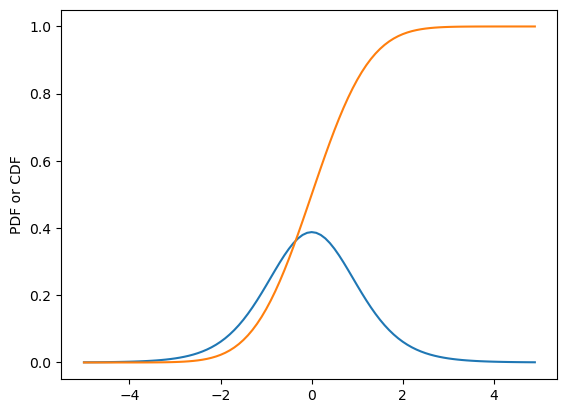

In [ ]:
# Plot the pdf and cdf
t = np.arange(-5, 5, 0.1)
plt.plot(t, ttest_pdf(nu, t))
plt.plot(t, ttest_cdf(t));
plt.ylabel("PDF or CDF");

In [ ]:
# Or do a numerical integration of the pdf

# Define the limits
a,b = -5, ttest_pair_stat(before, after)

x = np.linspace(a, b, 10000)
y = ttest_pdf(nu, x)

p_value_int = np.trapz(y, x)
print(f'p-value: {p_value_int:.5f}')

# Call 
p_value = ttest_cdf(b)
p_value



p-value: 0.10661


0.09057419685136375

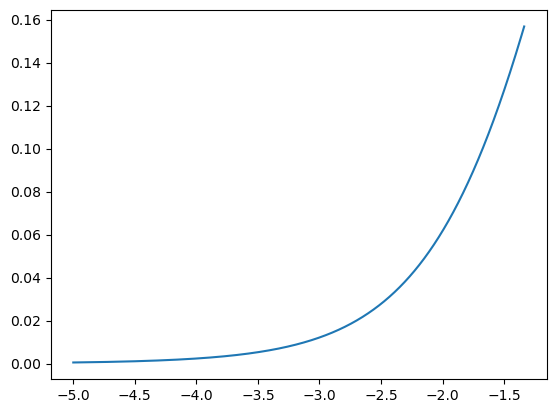

In [ ]:
plt.plot(x, y)

### Task 4 - ANOVA <a id="Task4"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

## References <a id="Ref"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

1. https://en.wikipedia.org/wiki/Lady_tasting_tea (accessed 23th Sept 2024)
2. https://en.wikipedia.org/wiki/Hypergeometric_distribution (accessed 26th Sept 2024)
3. https://numpy.org/doc/stable/reference/random/index.html (accessed 26th Sept 2024)
4. https://docs.python.org/3/library/math.html#math.comb (accessed 5th Oct 2024)
5. https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test (accessed 20th Oct 2024)
6. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html (accessed 20th Oct 2024)
7. Numpy Random normal generator: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html#numpy-random-normal (accessed 30th Oct 2024)
8. Scipy Shapiro-Wilk Test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro (accessed 04th Nov 2024)
9. Seaborn boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot (accessed 10th Nov 2024)
10. Student's t-test: https://en.wikipedia.org/wiki/Student%27s_t-test (accessed 10th Nov 2024)
11. Seaborn stripplot: https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot (accessed 10th Nov 2024)
12. Seaborn swarmplot: https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn-swarmplot (accessed 10th Nov 2024)
13. Scipy ttest_rel: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel (accessed 10th Nov 2024)
14. Student's t distribution: https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values
15. Laerd 

END
___